<a href="https://colab.research.google.com/github/rpasquini/defidata/blob/main/AAVE_graph_request_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examples of querys to AAVE's graph 

1. USD ETH Reference prices.
Entiendo que estos son precios del oraculo que quedaron grabados en el Graph. Revisar

usdEthPriceHistoryItems

2. Liquidations

Realizar time series plot con numero de liquidaciones


# Links 
Graph QL Basics
https://thegraph.com/docs/en/querying/graphql-api/

https://graphql.org/learn/queries/

AAVE's graph documentation 
https://docs.aave.com/developers/v/2.0/getting-started/using-graphql

Playground

https://thegraph.com/hosted-service/subgraph/aave/protocol-multy-raw


In [1]:
import requests
from pprint import pprint
from datetime import datetime

In [2]:
#(See https://thegraph.com/hosted-service/subgraph/aave/protocol-v2?version=current)
subgraph_http_address='https://api.thegraph.com/subgraphs/name/aave/protocol-v2'

# function to use requests.post to make an API call to the subgraph url
def run_query(query):

    # endpoint where you are making the request
    request = requests.post(subgraph_http_address,
                            json={'query': query})
    if request.status_code == 200:
        return request.json()
    else:
        raise Exception('Query failed. return code is {}.      {}'.format(request.status_code, query))

The skip parameter can be used to skip entities and paginate. e.g. first:100 shows the first 100 entities and first:100, skip:100 shows the next 100 entities.

In [ ]:
# Note 'usdEthPriceHistoryItems' ending in plural (instead of usdEthPriceHistoryItem) is the call to the generic class of elements.
# It allows retrieving several elements instead of only one. 
# example: obtain first 10 elements after skipping 5000
query = """
{
usdEthPriceHistoryItems(skip:5000, first: 10) {
    id
		price
    timestamp
  	oracle {
  	  id
  	}
    }
  }
"""
result = run_query(query)

In [ ]:
result

{'data': {'usdEthPriceHistoryItems': [{'id': '1143103747',
    'price': '1853533762117476',
    'timestamp': 1607682157,
    'oracle': {'id': '1'}},
   {'id': '1143103749',
    'price': '1853533762117476',
    'timestamp': 1607682157,
    'oracle': {'id': '1'}},
   {'id': '1143103751',
    'price': '1853533762117476',
    'timestamp': 1607682157,
    'oracle': {'id': '1'}},
   {'id': '1143103752',
    'price': '1853533762117476',
    'timestamp': 1607682157,
    'oracle': {'id': '1'}},
   {'id': '1143103753',
    'price': '1853533762117476',
    'timestamp': 1607682157,
    'oracle': {'id': '1'}},
   {'id': '1143103754',
    'price': '1853533762117476',
    'timestamp': 1607682157,
    'oracle': {'id': '1'}},
   {'id': '1143103759',
    'price': '1853113346923434',
    'timestamp': 1607682157,
    'oracle': {'id': '1'}},
   {'id': '1143103943',
    'price': '1852693122401780',
    'timestamp': 1607682166,
    'oracle': {'id': '1'}},
   {'id': '1143105240',
    'price': '185269312240178

Querying specific dates
- Querys use timestamps

In [3]:
from datetime import datetime
timestamp = 1607682157
dt_object = datetime.fromtimestamp(timestamp)
dt_object

datetime.datetime(2020, 12, 11, 10, 22, 37)

Get prices after Nov 4th 2022

In [ ]:
#datetime to timestamp
datetime_as_timestamp=datetime(2022, 11, 4).timestamp()
datetime_as_timestamp

1667520000.0

In [ ]:
str(int(datetime_as_timestamp))

'1667520000'

Example 2: Using **where** to filter with _gt suffix 
- It is unrecommended to use big skip values. Preferable to use a filter in the query
- Note the use of orderby and orderdirection 

In [ ]:
query = """
{
  usdEthPriceHistoryItems(first: 1000, orderBy: timestamp, orderDirection: asc, where: {timestamp_gt:"""+str(int(datetime_as_timestamp))+"""}) {
    id
    timestamp
    price
    oracle
    }
  }
"""
result = run_query(query)

Note: 
If a client needs to retrieve a large number of entities, it is much more performant to base queries on an attribute and filter by that attribute. For example, a client would retrieve a large number of tokens using this query:
```
query manyTokens($lastID: String) {
  tokens(first: 1000, where: { id_gt: $lastID }) {
    id
    owner
  }
}
```

In [7]:
import pandas as pd

In [8]:
df=pd.DataFrame.from_records(result['data']['usdEthPriceHistoryItems'])
df.head()

KeyError: ignored

In [ ]:
df['datetime']=df['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

In [ ]:
df['ETHUSD']=1/(df['price'].astype(int)*1e-18)
df

,id,timestamp,price,datetime,ETHUSD
0,1589304460,1667521415,649752999174408,2022-11-04 00:23:35,1539.046378
1,1589320423,1667523335,649565859837487,2022-11-04 00:55:35,1539.489776
2,15893503102,1667526923,650030226405527,2022-11-04 01:55:23,1538.390000
3,1589380276,1667530535,648962169454092,2022-11-04 02:55:35,1540.921870
4,1589405739,1667533619,645705924219251,2022-11-04 03:46:59,1548.692621
...,...,...,...,...,...
995,15943984100,1668136007,805483538705673,2022-11-11 03:06:47,1241.490300
996,1594399256,1668136103,812502430992546,2022-11-11 03:08:23,1230.765548
997,159440099,1668136307,808456252623197,2022-11-11 03:11:47,1236.925309
998,1594405740,1668136883,813636548553761,2022-11-11 03:21:23,1229.050000


In [ ]:
df.index=df.datetime

In [ ]:
df

,id,timestamp,price,datetime,ETHUSD
datetime,,,,,
2022-11-04 00:23:35,1589304460,1667521415,649752999174408,2022-11-04 00:23:35,1539.046378
2022-11-04 00:55:35,1589320423,1667523335,649565859837487,2022-11-04 00:55:35,1539.489776
2022-11-04 01:55:23,15893503102,1667526923,650030226405527,2022-11-04 01:55:23,1538.390000
2022-11-04 02:55:35,1589380276,1667530535,648962169454092,2022-11-04 02:55:35,1540.921870
2022-11-04 03:46:59,1589405739,1667533619,645705924219251,2022-11-04 03:46:59,1548.692621
...,...,...,...,...,...
2022-11-11 03:06:47,15943984100,1668136007,805483538705673,2022-11-11 03:06:47,1241.490300
2022-11-11 03:08:23,1594399256,1668136103,812502430992546,2022-11-11 03:08:23,1230.765548
2022-11-11 03:11:47,159440099,1668136307,808456252623197,2022-11-11 03:11:47,1236.925309


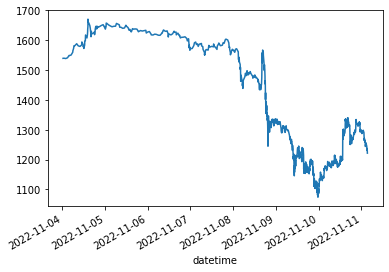

In [ ]:
df.ETHUSD.plot()

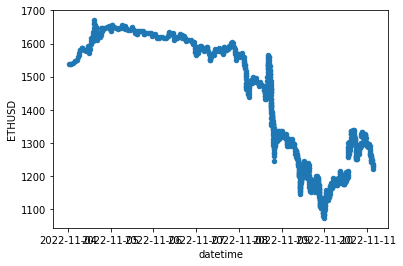

In [ ]:
df.plot.scatter('datetime','ETHUSD')

# Liquidaciones

* liquidator: Es la address del liquidador  
* user{id}:    Es el address del usuario liquidado
* principalAmount: El monto de la deuda (principal) que se repaga  
* collateralAmount: Monto del colateral que se obtiene
 
* CollateralReserve: Se refiere los datos de la reserva de la moneda (en el * protocolo) del colateral del prestamo que se está liquidando \\
* principalReserve: Se refiere a los datos de la reserva de la moneda  (en el protocolo) en la que se tomó el crédito.


In [9]:
query = """

{liquidationCalls(first: 10){
  id
  action
  
  liquidator
  principalAmount
  collateralAmount
  

  timestamp
  collateralReserve{id underlyingAsset symbol}
  principalUserReserve{id }
  pool{id }
  user{id}
 
  collateralAssetPriceUSD
  borrowAssetPriceUSD
  
}}
"""
result = run_query(query)

In [ ]:
result

{'data': {'liquidationCalls': [{'id': '11471171:28:0x9ef1c383398cee036a85ca024db051b7a1c8bc692e703fe1b230da9e2305eb4a:56:56',
    'action': 'LiquidationCall',
    'liquidator': '0x7a512a3cf68df453ec76d487e3eaffecd74d6887',
    'timestamp': 1608214767,
    'collateralAmount': '17805688961227928811',
    'collateralReserve': {'id': '0x6b175474e89094c44da98b954eedeac495271d0f0xb53c1a33016b2dc2ff3653530bff1848a515c8c5',
     'underlyingAsset': '0x6b175474e89094c44da98b954eedeac495271d0f',
     'symbol': 'DAI'},
    'principalAmount': '74305',
    'principalUserReserve': {'id': '0xa53fe221bd861f75907d8fd496db1c70779721aa0x2260fac5e5542a773aa44fbcfedf7c193bc2c5990xb53c1a33016b2dc2ff3653530bff1848a515c8c5'},
    'pool': {'id': '0xb53c1a33016b2dc2ff3653530bff1848a515c8c5'},
    'user': {'id': '0xa53fe221bd861f75907d8fd496db1c70779721aa'},
    'collateralAssetPriceUSD': '1.001979417875997056779844810469726',
    'borrowAssetPriceUSD': '22867.05548912266602380709495821367'},
   {'id': '11471182:

In [ ]:
start=datetime(2022, 11, 22).timestamp()
end=datetime(2022, 11, 23).timestamp()

In [ ]:
print(start, end)

1669075200.0 1669161600.0


Combining conditions

```(where: { _or: [{ someField: "1" }, { someField2: "2" }] })``` \\

```where: {
    and: [{ name: { contains: "a" } }, { endDate: { gte: "2017-12-31" } }]
  }```

In [ ]:
query="""
{liquidationCalls(first: 10, 
filter:{timestamp: { between: [1669075200, 1669161600]}}
){
  id
  action
  
  liquidator
  timestamp
  collateralAmount
  collateralReserve{id underlyingAsset symbol}
  principalAmount
  principalUserReserve{id }
  pool{id }
  user{id}
 
  collateralAssetPriceUSD
  borrowAssetPriceUSD
  
}}
"""
result = run_query(query)
result

{'data': {'liquidationCalls': [{'id': '11471171:28:0x9ef1c383398cee036a85ca024db051b7a1c8bc692e703fe1b230da9e2305eb4a:56:56',
    'action': 'LiquidationCall',
    'liquidator': '0x7a512a3cf68df453ec76d487e3eaffecd74d6887',
    'timestamp': 1608214767,
    'collateralAmount': '17805688961227928811',
    'collateralReserve': {'id': '0x6b175474e89094c44da98b954eedeac495271d0f0xb53c1a33016b2dc2ff3653530bff1848a515c8c5',
     'underlyingAsset': '0x6b175474e89094c44da98b954eedeac495271d0f',
     'symbol': 'DAI'},
    'principalAmount': '74305',
    'principalUserReserve': {'id': '0xa53fe221bd861f75907d8fd496db1c70779721aa0x2260fac5e5542a773aa44fbcfedf7c193bc2c5990xb53c1a33016b2dc2ff3653530bff1848a515c8c5'},
    'pool': {'id': '0xb53c1a33016b2dc2ff3653530bff1848a515c8c5'},
    'user': {'id': '0xa53fe221bd861f75907d8fd496db1c70779721aa'},
    'collateralAssetPriceUSD': '1.001979417875997056779844810469726',
    'borrowAssetPriceUSD': '22867.05548912266602380709495821367'},
   {'id': '11471182:

https://aave.blockanalitica.com/wallets/0x57e04786e231af3343562c062e0d058f25dace9e/

Query a las liquidaciones que liquidaron al usuario "0x57e04786e231af3343562c062e0d058f25dace9e", que es el famoso Aavi que tomo un prestamo en CRV (usando USDC como colateral). 
El protocolo lo liquidó a tiempo, los liquidadores salieron a pagar el CRV y se llevaron el colateral en USDC.

En el query estamos pidiendo las liquidationCalls que tienen al usuario que fue liquidado (un nested object con id del usuario) con el id "0x57e04786e231af3343562c062e0d058f25dace9e".
Además estoy filtrando los resultados, quedandome solo con los timestamp entre el 22 y 23 de noviembre (que es la fecha en que ocurrió el ataque).


Notar el uso del guion bajo cuando nos referimos al contenido del objeto user.
Notar tambien el uso del between.

In [10]:
query="""
{
  liquidationCalls(first: 1000, 
    where:{user_:{id:"0x57e04786e231af3343562c062e0d058f25dace9e"}},
    filter:{timestamp: { between: [1669075200, 1669161600]}}
  ) 
  {
    id
    liquidator
    timestamp
    user{id}
    principalAmount
    collateralAmount
    collateralReserve{id underlyingAsset symbol decimals}
    collateralUserReserve{id reserve{id underlyingAsset symbol decimals totalLiquidity totalDeposits} }
 
    principalReserve{id underlyingAsset symbol decimals}
    collateralAssetPriceUSD
    borrowAssetPriceUSD

}}
"""
result = run_query(query)


In [11]:
df=pd.DataFrame.from_records(result['data']['liquidationCalls'])

Número de liquidaciones y bloques

In [12]:
df.shape[0]

385

In [13]:
print('number of blocks', df.timestamp.unique().shape[0])

number of blocks 216



Cuento el número de liquidadores

In [ ]:
df['liquidator'].unique()

array(['0xc2a54f74ebbbba5ed92d6a0b5dcb0b0ffb96f36e',
       '0xabcf5d4be599f1c7f71fcbcae4643a2aa849f4c8',
       '0x80d4230c0a68fc59cb264329d3a717fcaa472a13',
       '0x7719494eb8f3ca261f5c806d754853dc5ce2edf7',
       '0x6c6b87d44d239b3750bf9badce26a9a0a3d2364e',
       '0x9bae78d1c67826cde91b20b49690589ed0879fc7',
       '0xcda3d75a1a247bf3fa9efd0727db54d7cf0c90c2',
       '0xe3b9ed955bf1c8c520bb9420abac6e62bb110b29',
       '0x0000000000bb00d4f9ace884c5709edfcf587e1c',
       '0x4f381fb46dfde2bc9dcae2d881705749b1ed6e1a',
       '0xd911560979b78821d7b045c79e36e9cbfc2f6c6f',
       '0x45cb6131d548344c7f150d958026fe0923ea86e4',
       '0xd542aa8f1789edf123ad816c1b59ed9fed15c50e',
       '0xc37704a457b1ee87eb657cae584a34961e86acac',
       '0x8bc110db7029197c3621bea8092ab1996d5dd7be',
       '0x30be05fe3ed386b8d8afb327b03f50c9d97dcb85',
       '0xdfd3bd446f1b7fd96dc995126ee845af0b1254cd',
       '0x1df8ea15bb725e110118f031e8e71b91abaa2a06',
       '0x0fe269d6d9e04ecc659b6e3d582a7f35ce41

Grafico la cantidad de liquidaciones por liquidador. Muestro que, incluso en este grupo pequeño, están muy concentradas.

In [24]:
df2=df.groupby('liquidator')['id'].count().reset_index()

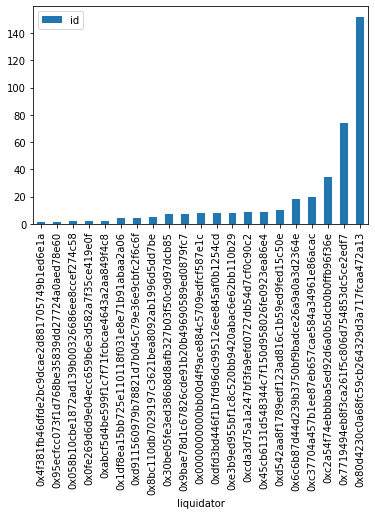

In [32]:
df2.sort_values('id').plot(kind='bar', x='liquidator')

In [ ]:
print('total colateral seized (USDC)',sum(df['collateralAmount'].astype('float')*(10**-6)))

total colateral seized (USD) 63605103.12404197


In [ ]:
print('total principal payed (CRV)',sum(df['principalAmount'].astype('float')*(10**-18)))

total principal payed (CRV) 89544317.44385089


In [ ]:
df['collateralReserve']

0      {'id': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606...
1      {'id': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606...
2      {'id': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606...
3      {'id': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606...
4      {'id': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606...
                             ...                        
380    {'id': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606...
381    {'id': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606...
382    {'id': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606...
383    {'id': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606...
384    {'id': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606...
Name: collateralReserve, Length: 385, dtype: object

Usar json_normalize para normalizar las columnas que están en Json

In [ ]:
pd.json_normalize(df['principalReserve'])

,id,underlyingAsset,symbol,decimals
0,0xd533a949740bb3306d119cc777fa900ba034cd520xb5...,0xd533a949740bb3306d119cc777fa900ba034cd52,CRV,18
1,0xd533a949740bb3306d119cc777fa900ba034cd520xb5...,0xd533a949740bb3306d119cc777fa900ba034cd52,CRV,18
2,0xd533a949740bb3306d119cc777fa900ba034cd520xb5...,0xd533a949740bb3306d119cc777fa900ba034cd52,CRV,18
3,0xd533a949740bb3306d119cc777fa900ba034cd520xb5...,0xd533a949740bb3306d119cc777fa900ba034cd52,CRV,18
4,0xd533a949740bb3306d119cc777fa900ba034cd520xb5...,0xd533a949740bb3306d119cc777fa900ba034cd52,CRV,18
...,...,...,...,...
380,0xd533a949740bb3306d119cc777fa900ba034cd520xb5...,0xd533a949740bb3306d119cc777fa900ba034cd52,CRV,18
381,0xd533a949740bb3306d119cc777fa900ba034cd520xb5...,0xd533a949740bb3306d119cc777fa900ba034cd52,CRV,18
382,0xd533a949740bb3306d119cc777fa900ba034cd520xb5...,0xd533a949740bb3306d119cc777fa900ba034cd52,CRV,18
383,0xd533a949740bb3306d119cc777fa900ba034cd520xb5...,0xd533a949740bb3306d119cc777fa900ba034cd52,CRV,18


In [ ]:
df['collateralAssetPriceUSD'].astype(float)

0      1.006597
1      1.006597
2      1.006597
3      1.006597
4      1.006597
         ...   
380    0.996178
381    0.996178
382    0.996178
383    0.996178
384    0.996178
Name: collateralAssetPriceUSD, Length: 385, dtype: float64

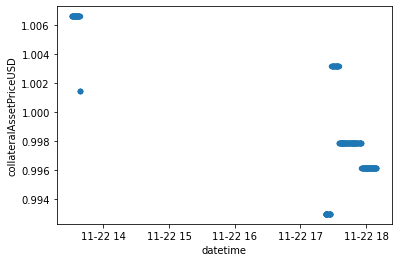

In [ ]:
#df['collateralAssetPriceUSD']
def tsgraph(var):
  df['datetime']=df['timestamp'].apply(lambda x: datetime.fromtimestamp(x))
  df[var]=df[var].astype(float)
  df.plot.scatter('datetime',var)

tsgraph('collateralAssetPriceUSD')

El precio del CRV empezó a aumentar, posiblemente para poder liquidar y llevarse los dolares.

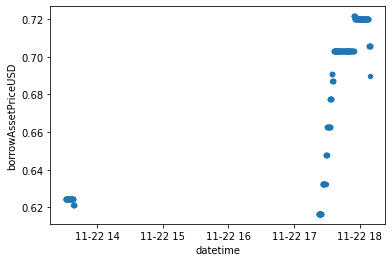

In [ ]:
tsgraph('borrowAssetPriceUSD')

In [14]:
df.columns

Index(['id', 'liquidator', 'timestamp', 'user', 'principalAmount',
       'collateralAmount', 'collateralReserve', 'collateralUserReserve',
       'principalReserve', 'collateralAssetPriceUSD', 'borrowAssetPriceUSD'],
      dtype='object')

¿Cuán rápido ocurrieron las liquidaciones? Gráfico de liquidaciones de colateral contra el tiempo.

In [42]:
def graph2():
  df2=df.groupby('timestamp')['collateralAmount'].sum().reset_index()
  df2['collateralAmount']=df2['collateralAmount'].astype('float')*(10**-6)
  df2['datetime']=df2['timestamp'].apply(lambda x: datetime.fromtimestamp(x))
  #df2.plot.scatter('datetime','collateralAmount')
  return df2

graph2()['collateralAmount']

0      2.051365e+15
1      2.287268e+46
2      6.565009e+04
3      1.311414e+17
4      1.472497e+15
           ...     
211    3.501507e+28
212    6.691960e+05
213    3.446767e+16
214    1.644928e+17
215    1.375307e+12
Name: collateralAmount, Length: 216, dtype: float64

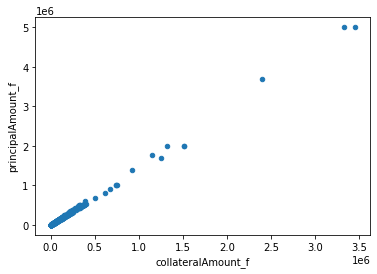

In [45]:
def graph3():
  df['collateralAmount_f']=df['collateralAmount'].astype('float')*(10**-6)
  df['principalAmount_f']=df['principalAmount'].astype('float')*(10**-18)
  df.plot.scatter('collateralAmount_f','principalAmount_f')
graph3()

¿Cuánto colateral quedaba por liquidarse y cuán rapido se cerró la posición unhealthy ?